In [1]:
from cag.graph_framework.components import AnalyzerBase
from cag.graph_framework.graph.base_graph import BaseGraph
from pyArango.graph import Graph, EdgeDefinition
from pyArango.query import AQLQuery
from cag.utils.config import Config


class KnowledgeGraph(BaseGraph):
    _edgeDefinitions = [EdgeDefinition('GenericEdge', fromCollections=[
                                       'GenericNode'], toCollections=['GenericNode'])]
    _orphanedCollections = []


class CorpusDistanceAnalyzer(AnalyzerBase):
    def __init__(self, conf: Config):
        super().__init__(conf, run=False)

    def run(self, f_id, t_id):
        query = """FOR c_1 IN Corpus
    FILTER c_1._key==@f_id
    FOR c_2 IN Corpus
        FILTER c_2._key==@t_id
            FOR path IN 1..10 ANY K_PATHS c_1 TO c_2 CorpusHas, HasKeyterm
                LIMIT 1000
                RETURN path"""
        aql = self.database.AQLQuery(query, bindVars={
            'f_id': f_id, 't_id': t_id}, rawResults=True)
        data = list(aql)
        return self.create_networkx(data,weight_edges=True)
        #cd.visualize_graph() would immediately create a pyvis graph and save the .html-viz
        # you could show the returned graph using .show()

conf = Config(url="http://sc-0050vml:8530/", user='root',
              password='root', graph='KnowledgeGraph',database='SKG-IN')
cd = CorpusDistanceAnalyzer(conf)
g=cd.run('Pangaea','DLR_elib')

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

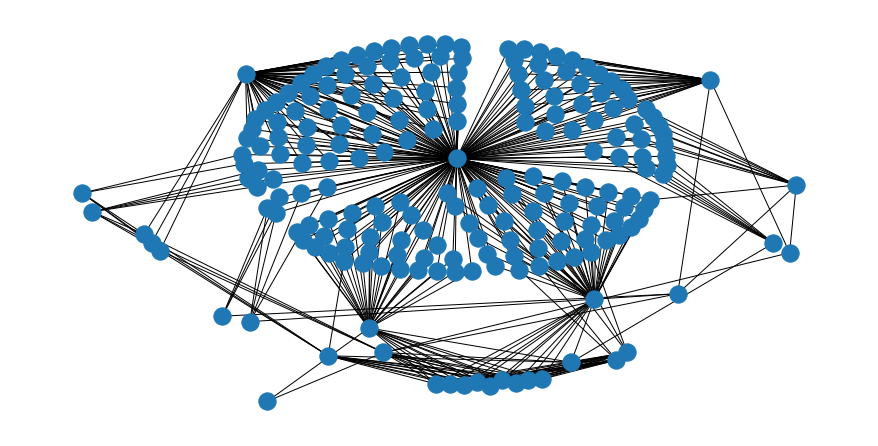

In [9]:

fig=plt.figure(figsize=(12, 6))
nx.draw_kamada_kawai(g)

c:\ProgramData\Miniforge3\envs\scraper\lib\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())
c:\ProgramData\Miniforge3\envs\scraper\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\ProgramData\Miniforge3\envs\scraper\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


(array([  1.,   0.,   2.,   5.,   7., 187.,   5.,   2.,   0.,   1.]),
 array([-1.47283060e+01+0.j, -1.17826448e+01+0.j, -8.83698359e+00+0.j,
        -5.89132240e+00+0.j, -2.94566120e+00+0.j, -1.24344979e-14+0.j,
         2.94566120e+00+0.j,  5.89132240e+00+0.j,  8.83698359e+00+0.j,
         1.17826448e+01+0.j,  1.47283060e+01+0.j]),
 <BarContainer object of 10 artists>)

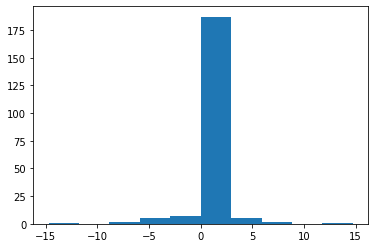

In [12]:
plt.hist(nx.adjacency_spectrum(g))

In [15]:
nx.average_shortest_path_length(g)

2.2662565504670766

In [16]:
nx.average_node_connectivity(g)

2.051082251082251